# Loan Data Exploration
## by Isaac

## Introduction
The dataset used for this project is the Prosper Loan Dataset, which is America’s lending platform.
his data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, payment information and other.
The major goals of this project are to investigate the numerous factors that influence borrower behavior and to gain insight into the interactions between various variables via the use of data visualizations and summary statistics.
Some of the items that am going to explore are

- States have the most and least number of borrowers 
- Reason for taking a loan 
- Loan period, Prosper rating and employment status
- Borrower per home owner an monthly income   
- Borrower per year distribution  
- Prosper Score versus different variables
- Interest Rate, Yield and Estimated Loss 
- Loan Category versus different variables 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> ### Dataset Preprocessing

In [2]:
# Importing Dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Examine the  dataset
print(df.shape)
df.head(3)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [4]:
#check for duplicate in the dataset
df.duplicated().sum()

0

In [5]:
# Converting Loan Date from String to datetime64
df['LoanOriginationDate'] = df['LoanOriginationDate'].astype('datetime64')
# Extracting Year in which Loan Originated
df['LoanOriginationYear'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

In [6]:
# for null in TotalProsperLoans we areplace by 0
df['TotalProsperLoans'] = df['TotalProsperLoans'].fillna(0)

In [7]:
# Defining Function To Replace Listing Category Number with String
def replace_cat_num(numeric):
    list_dict = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return list_dict[numeric]

# Adding Column to Dataframe for Category String
df['ListingCategory'] = df['ListingCategory (numeric)'].apply(replace_cat_num)
# Dropping Numeric Column
df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [8]:
df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationYear,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,1.0,0,0,0.0,41,2007,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,Motorcycle
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,Home Improvement
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2013,Debt Consolidation
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2013,Debt Consolidation


## Univariate Exploration

### Which states have the most and least number of borrowers ?

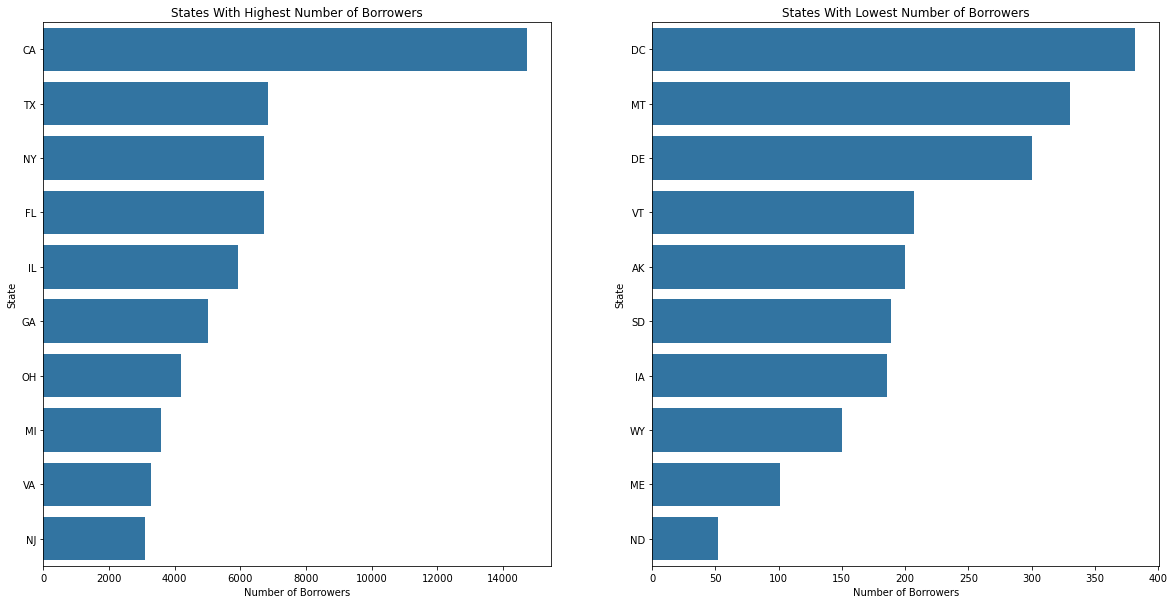

In [9]:
most_state_list = df['BorrowerState'].value_counts()[:10].index.tolist()
most_state_count = df['BorrowerState'].value_counts()[:10].values.tolist()

least_state_list = df['BorrowerState'].value_counts()[-10:].index.tolist()
least_state_count = df['BorrowerState'].value_counts()[-10:].values.tolist()
 

plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]

sb.barplot(x=most_state_count, y=most_state_list,color =base_color)
plt.title('States With Highest Number of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('State')

plt.subplot(1, 2, 2)
sb.barplot(x=least_state_count, y=least_state_list, color = base_color)
plt.title('States With Lowest Number of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('State')
plt.show()



>**Findings**: 

The state of CA, is the state with the most number of borrowers, and CA, TX and NY are the top 3 states with the most number of borrowers.
The state of ND is the state with the least number of borrowers, and WY, ME and ND are the 3 states with the least number of borrowers.


###  What was the most common reason for taking a loan ?

Text(0, 0.5, 'Listing category')

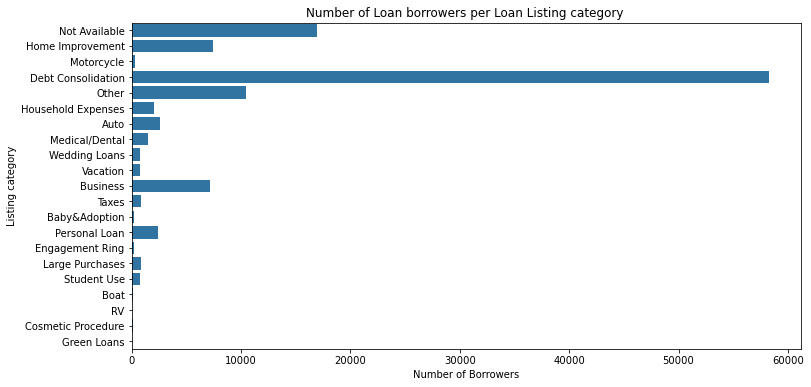

In [29]:
fig = plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df,y='ListingCategory',color = base_color)

plt.title('Number of Loan borrowers per Loan Listing category ')
plt.xlabel('Number of Borrowers')
plt.ylabel('Listing category')

#### Finding
Most of the loans were categorised as Debt Consolidation. Some of the most common categories of loans are:
- Debt Consolidation
- Home Improvement
- Business

However, many loans were listed in the categories of Not Available and Other, thus making it difficult to determine accurately which was the most common reason for taking a loan.


### What does distributions of term, Prosper rating and employment status look like

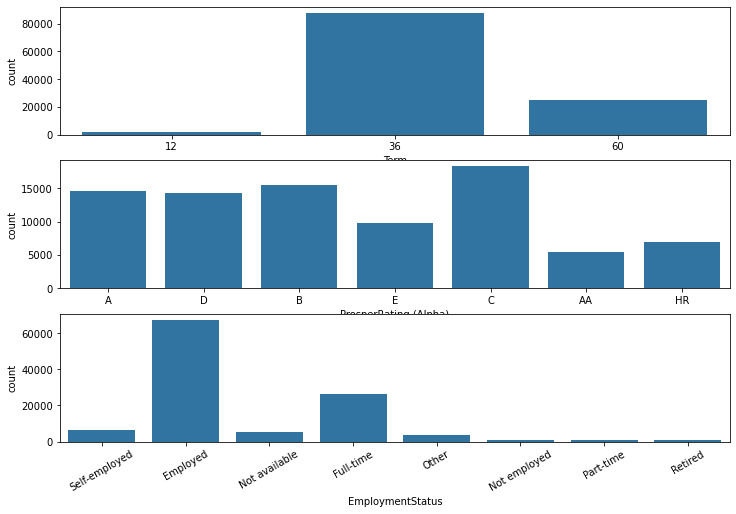

In [32]:
fig, ax = plt.subplots(nrows=3, figsize = [12,8]) 
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term', color = default_color, ax = ax[0])

sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

#### Finding
The length of most of the loans are 36 months. The ratings of most of the borrowers are among D,C,B and A. Most of borrowers are employed and full-time.

### How many of the borrowers own a home ? 

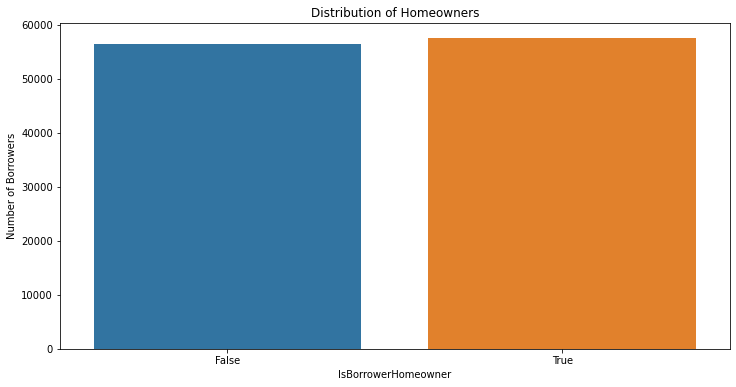

In [12]:
fig = plt.figure(figsize=(12,6))
sb.countplot(x='IsBorrowerHomeowner', data=df)
plt.title('Distribution of Homeowners')
plt.ylabel('Number of Borrowers')
plt.show()

It can be seen that there is almost a 50-50 distribution of borrowers who own a home, i.e almost half the borrowers own a home, whereas the other half do not own a home.

### What was the distribution of stated monthly income

Text(0, 0.5, 'Monthly Income')

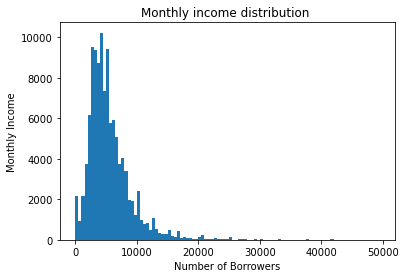

In [33]:
# Distribution of stated monthly income
plt.figsize=(25,8)
bin = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bin);
plt.title('Monthly income distribution ')
plt.xlabel('Number of Borrowers')
plt.ylabel('Monthly Income')

#### Finding
The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

###   What was the distribution of the  borrower APR?

Text(0.5, 1.0, ' Distribution of the Borrower APR')

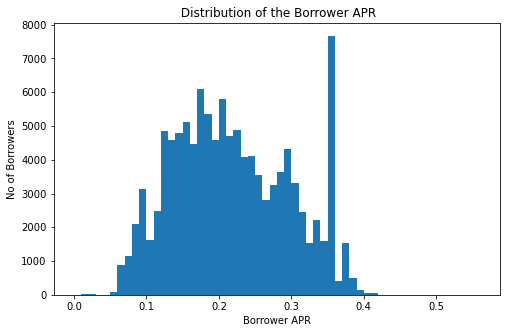

In [14]:
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('No of Borrowers')
plt.title(' Distribution of the Borrower APR')

#### Finding
The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [15]:
# Check loans with APR greater than 0.43
df[df.BorrowerAPR>0.43]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationYear,ListingCategory
18326,0161336483146123835D6A5,1795,2006-03-11 15:43:45.393000000,HR,36,Defaulted,2007-01-14 00:00:00,0.45857,0.4500,0.4325,...,2829.24,2829.24,0.0,1.0,0,0,0.0,21,2006,Not Available
22195,5686336572505607862C0C7,1849,2006-03-12 13:44:15.060000000,HR,36,Chargedoff,2009-02-15 00:00:00,0.46201,0.4500,0.4325,...,490.46,490.50,0.0,1.0,0,0,0.0,21,2006,Not Available
36018,844033650124564886B3EDC,690,2006-02-23 13:57:02.087000000,HR,36,Completed,2006-03-14 00:00:00,0.51229,0.4975,0.4925,...,0.00,0.00,0.0,1.0,0,0,0.0,9,2006,Not Available
56761,A79D33661366830833F3EF5,2231,2006-03-16 19:30:16.753000000,HR,36,Defaulted,2006-09-19 00:00:00,0.50633,0.4975,0.4800,...,2964.88,2964.88,0.0,1.0,0,0,0.0,21,2006,Not Available
82043,BBED336465905564254DC8B,1112,2006-03-02 19:00:17.593000000,HR,36,Defaulted,2006-09-05 00:00:00,0.48873,0.4800,0.4750,...,2963.64,2963.64,0.0,1.0,0,0,0.0,20,2006,Not Available
103973,95ED3365915044756AB754F,1366,2006-03-06 22:36:53.753000000,HR,36,Defaulted,2006-10-08 00:00:00,0.45857,0.4500,0.4325,...,2764.01,2764.01,0.0,1.0,0,0,0.0,22,2006,Not Available


The 6 borrowers with largest APR have small loan amount and don't have records of Prosper rating and employment status.

### How many of the borrowers are employed ?

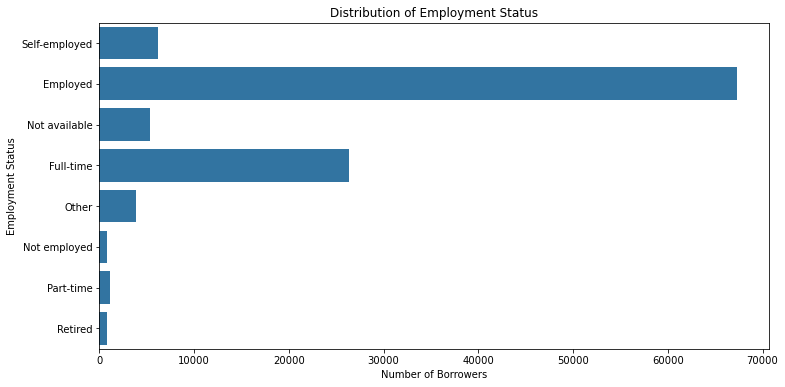

In [16]:
fig = plt.figure(figsize=(12,6))
default_color = sb.color_palette()[0]
sb.countplot(y='EmploymentStatus', data=df,color =default_color)
plt.title('Distribution of Employment Status')
plt.ylabel('Employment Status')
plt.xlabel('Number of Borrowers')
plt.show()


Most of the borrowers are Employed, with some of the borrowers being listed as Not Available and Other, whereas only a few of the borrowers were Not Employed.Also, some small number of the borrowers are also Retired.

### In which year, the highest number of loans originated ?

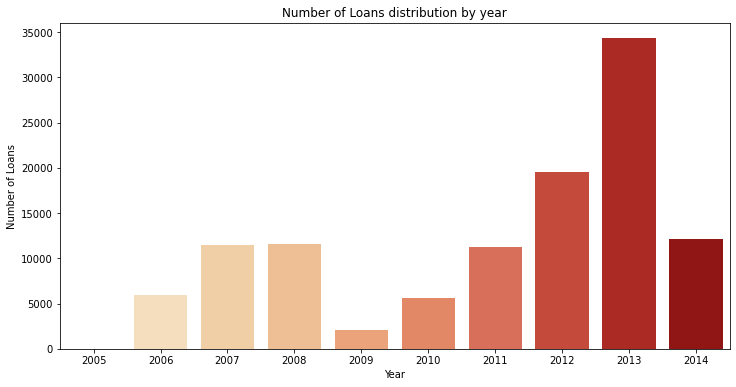

In [17]:
fig = plt.figure(figsize=(12,6)) 
sb.countplot(x='LoanOriginationYear', data=df, palette='OrRd')
plt.title('Number of Loans distribution by year')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.show()

#### Finding
The highest number of loans were originated in the year of 2013, whereas the least number of loans originated in the year of 2005.
Additionally, it can also be seen that a positively increasing trend can be observed in the number of loan originations starting from the year 2009 to 2013, which peaked in 2013, and then the trend changed. It can also be seen that the number of loans almost doubled every year in comparison to the previous year, for the year 2009 - 2013.

## Bivariate Exploration

### Started by pairwise correlations present between features in the data.

In [18]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

Text(0.5, 1.0, 'Correlation between Loan Amount, Borrower APR and Monthly Income')

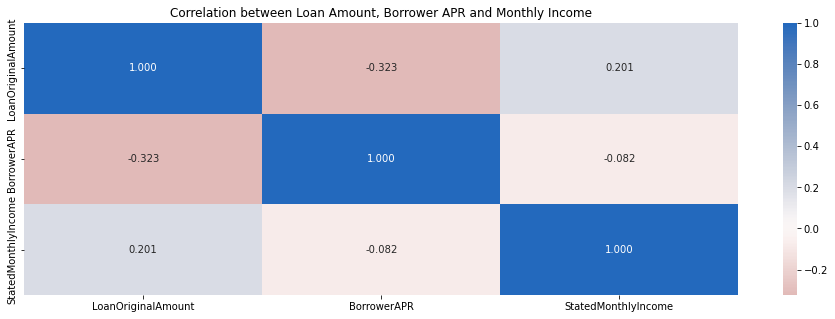

In [35]:
# correlation plot
plt.figure(figsize = [16, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation between Loan Amount, Borrower APR and Monthly Income') 

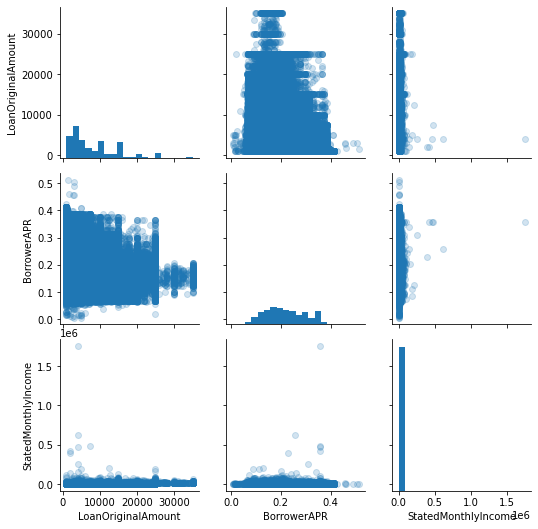

In [37]:
# plot matrix: sample 100000  
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_df = df[['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']].dropna() 
g = sb.PairGrid(data = loan_df )
g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);
 

#### Finding
The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

### Do Higher Duration of Loans indicate Higher Loan Amounts?

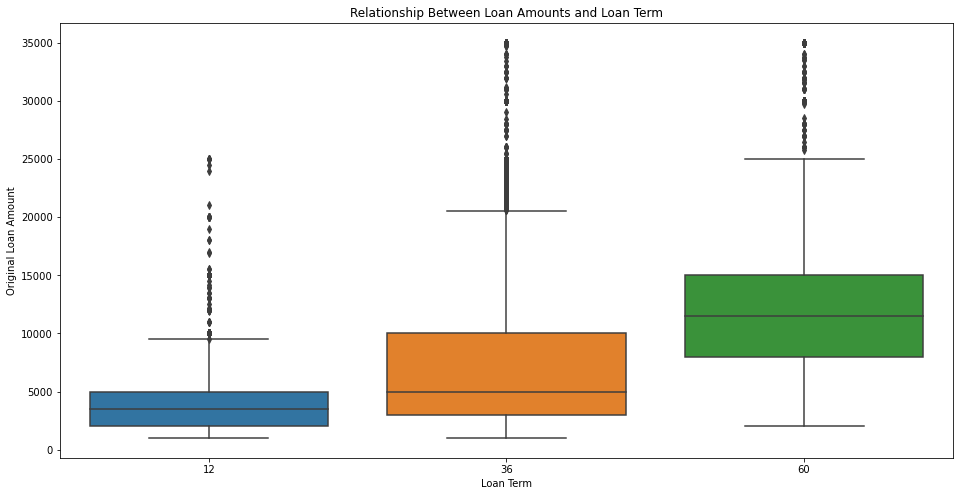

In [21]:
fig = plt.figure(figsize=(16,8))
sb.boxplot(y='LoanOriginalAmount', x='Term', data=df)
plt.title('Relationship Between Loan Amounts and Loan Term')
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Term')
plt.show()

#### Finding
This relation is proved to be true, it can be clearly observed that for the majority of the loans, Higher Duration Loans have a higher range of Loan Amounts.

### Is Prosper Score dependent on Credit Score ?

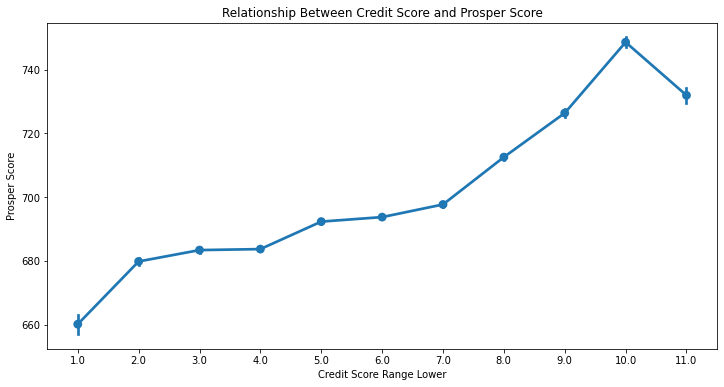

In [22]:
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='CreditScoreRangeLower', x='ProsperScore',data=df)
plt.title('Relationship Between Credit Score and Prosper Score')
plt.ylabel('Prosper Score')
plt.xlabel('Credit Score Range Lower')
plt.show()

#### Finding
A Strong Relationship between Credit Score and Prosper Score can be observed. It can be seen that Higher Credit Score leads to a Higher Prosper Score.

### Does Higher Income translate to Higher Prosper Scores ?

In [23]:
fig = plt.figure(figsize=(12,6))
sb.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=dataset)
plt.title('Relationship between Monthly Income and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.show()

NameError: name 'dataset' is not defined

<Figure size 864x432 with 0 Axes>

#### Findings
It can be observed that there is Strong Positive Correlation between Monthly Income and Prosper Score. The higher the Monthly Income, Higher the Prosper Score.

## Multivariate Exploration
 



### What was rating and term effects on stated monthly income and loan original amount variables

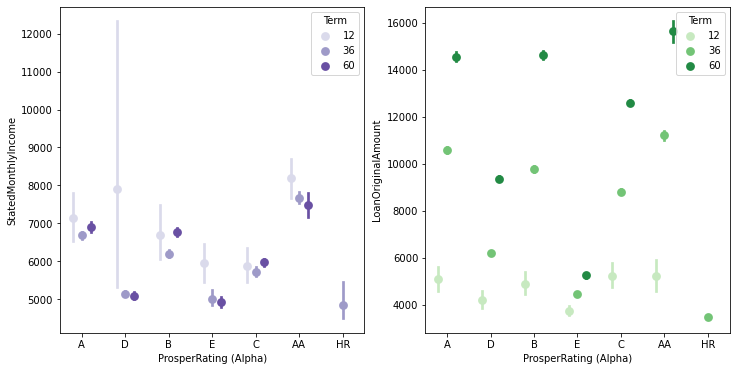

In [41]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df, x = 
             'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);
 
plt.show()

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### What is the relationship between Interest Rate, Yield and Estimated Loss?

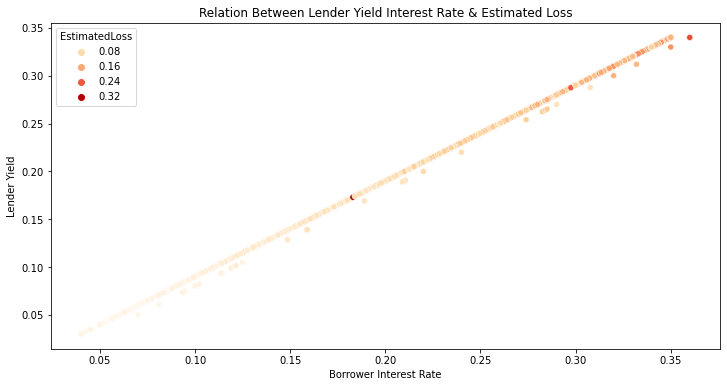

In [25]:
fig = plt.figure(figsize=(12,6))
sb.scatterplot(x='BorrowerRate', y='LenderYield',
                hue='EstimatedLoss',y_jitter=0.9, data=df,
               palette='OrRd')
plt.title('Relation Between Lender Yield Interest Rate & Estimated Loss')
plt.xlabel('Borrower Interest Rate')
plt.ylabel('Lender Yield')
plt.show()

#### Finding
It can be seen that a Strong Positive Correlation between Interest Rate, Yield and Estimated Loss.
With the Increase in Interest, both Yield and Estimated Loss increase in the same proportion.

### Does the Prosper Score affect the Loan Amount or Monthly Payments ?

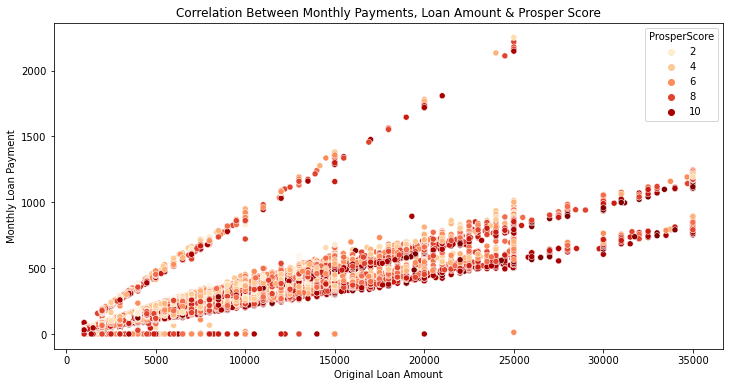

In [26]:
fig = plt.figure(figsize=(12,6))
sb.scatterplot(x='LoanOriginalAmount', y='MonthlyLoanPayment',
               data=df, hue='ProsperScore', palette='OrRd')
plt.title('Correlation Between Monthly Payments, Loan Amount & Prosper Score')
plt.ylabel('Monthly Loan Payment')
plt.xlabel('Original Loan Amount')
plt.show()

#### Finding
A relationship can be observed between Monthly Payments and Loan Amount. Higher Loan Amount leads to Higher Monthly Payments. However, no effect of Prosper Score can be seen on either, as neither does Higher Prosper Score lead to Higher Loan Amount or Monthly Amount nor vice-versa.


### How is the relationship between Amount, Listing Category Loan and Loan Status relate

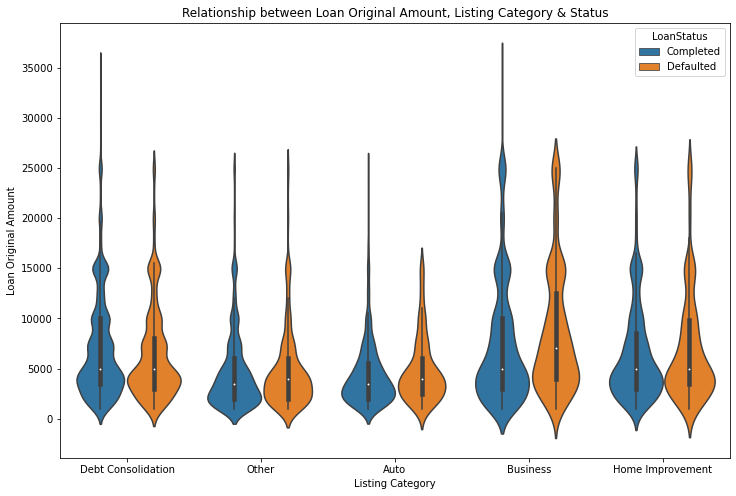

In [39]:
categories_subset = (df['ListingCategory'] == 'Debt Consolidation') | (df['ListingCategory'] == 'Other') |\
                  (df['ListingCategory'] == 'Business') |(df['ListingCategory'] == 'Home Improvement')|\
                 (df['ListingCategory'] == 'Auto')

df_filtered = df[categories_subset]
cat_status_subset = (df_filtered['LoanStatus'] == 'Completed') | (df_filtered['LoanStatus'] == 'Defaulted') |\
                  (df_filtered['LoanStatus'] == 'Chargedoff')
df_filtered = df_filtered[cat_status_subset]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df_filtered['LoanStatus'] = df_filtered.apply(change_to_defaulted, axis=1)
df_filtered.LoanStatus.value_counts() 

plt.figure(figsize = [12, 8])
sb.violinplot(data=df_filtered, x='ListingCategory', y='LoanOriginalAmount', hue='LoanStatus');

plt.title('Relationship between Loan Original Amount, Listing Category & Status')
plt.ylabel('Loan Original Amount')
plt.xlabel('Listing Category')
plt.show()

In [28]:
print(df_filtered.LoanOriginalAmount.median())
print(df_filtered.LoanOriginalAmount.mean())

5000.0
6475.9523202525115


### Finding 
Business category tend to have larger amount.Auto, Business and Home Improvement don't have nearly equal mean among all of them.


## Conclusions
>- The cities with higher population is likely to have a larger number of loan borrowers.
>- Major reason for taking a loan is for betterment of their life e.g funding a business, home improvement.
>- Most of borrowers are employed and full-time.
>- Higher Duration Loans have a higher range of Loan Amounts. 
